# Plot the figure 5

In this last notebook, we load the data generated from the previous notebook. The previous notebook might take a while to compute. If you just want to generate the figure without evaluate the model, you can simply use this notebook.

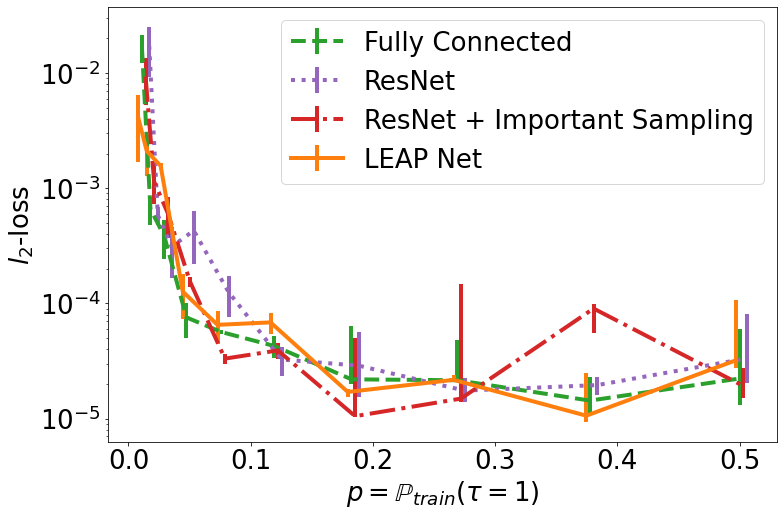

In [2]:
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

with open("scores_5.json", "r") as f:
    scores = json.load(f)
with open("scores_minus1_5.json", "r") as f:
    scores_minus1 = json.load(f)
with open("scores_plus1_5.json", "r") as f:
    scores_plus1 = json.load(f)
    
nmax = 100
alpha_conf_int = 0.05

actual_p_trains_leap = []
median_leap = []
per_leap_90 = []
per_leap_10 = []
actual_p_trains_fc = []
median_fc = []
per_fc_90 = []
per_fc_10 = []
include_oversampling = False
include_resnet = False
spread_lag = 0.003
spread_lag = 0.003
def get_confidence_int(vect):
    mid = np.mean(vect)
    std = np.std(vect)
    low = max(mid - std, 1e-4)
    up = mid + std
    return low, mid, up

def get_confidence_int(vect):
    low, mid, up = np.percentile(vect, [20, 50, 80])
    return low, mid, up


for p_train in list(scores["leap"]):
    low, mid, up = get_confidence_int(scores["leap"][p_train][:nmax])
    median_leap.append(mid)
    per_leap_90.append(up)
    per_leap_10.append(low)
    actual_p_trains_leap.append(float(p_train))
median_leap = np.array(median_leap)
per_leap_90 = np.array(per_leap_90)
per_leap_10 = np.array(per_leap_10)
actual_p_trains_leap = np.array(actual_p_trains_leap) - spread_lag

for p_train in list(scores["fc"]):
    low, mid, up = get_confidence_int(scores["fc"][p_train][:nmax])
    median_fc.append(mid)
    per_fc_90.append(up)
    per_fc_10.append(low)
    actual_p_trains_fc.append(float(p_train))
median_fc = np.array(median_fc)
per_fc_90 = np.array(per_fc_90)
per_fc_10 = np.array(per_fc_10)
actual_p_trains_fc = np.array(actual_p_trains_fc) + 0*spread_lag

if 'os' in scores:
    actual_p_trains_os = []
    median_os = []
    per_os_90 = []
    per_os_10 = []
    include_oversampling = True
    for p_train in list(scores["os"]):
        low, mid, up = get_confidence_int(scores["os"][p_train][:nmax])
        median_os.append(mid)
        per_os_90.append(up)
        per_os_10.append(low)
        actual_p_trains_os.append(float(p_train))
    median_os = np.array(median_os)
    per_os_90 = np.array(per_os_90)
    per_os_10 = np.array(per_os_10)
    actual_p_trains_os = np.array(actual_p_trains_os) + spread_lag
    
if 'rn' in scores:
    actual_p_trains_rn = []
    median_rn = []
    per_rn_90 = []
    per_rn_10 = []
    include_resnet = True
    for p_train in list(scores["rn"]):
        low, mid, up = get_confidence_int(scores["rn"][p_train][:nmax])
        median_rn.append(mid)
        per_rn_90.append(up)
        per_rn_10.append(low)
        actual_p_trains_rn.append(float(p_train))
    median_rn = np.array(median_rn)
    per_rn_90 = np.array(per_rn_90)
    per_rn_10 = np.array(per_rn_10)
    actual_p_trains_rn = np.array(actual_p_trains_rn) + 2*spread_lag
        
plt.figure(figsize=[12,8])
# plt.plot(actual_p_trains_fc, median_fc, label='Fully Connected', c="#2ca02c")
# plt.fill_between(actual_p_trains_fc, per_fc_90, per_fc_10, alpha=alpha_conf_int, color="#2ca02c") # , label='FC 20-80 percentile area'
plt.errorbar(actual_p_trains_fc, median_fc, yerr=[median_fc-per_fc_10, per_fc_90-median_fc],
             label='Fully Connected', c="#2ca02c", linewidth=4, ls="--")
if include_resnet:  
    # plt.plot(actual_p_trains_rn, median_rn, label='ResNet', c="#9467bd")
    # plt.fill_between(actual_p_trains_rn, per_rn_90, per_rn_10, alpha=alpha_conf_int, color="#9467bd") # , label='ResNet 20-80 percentile area'
    plt.errorbar(actual_p_trains_rn, median_rn, yerr=[median_rn-per_rn_10, per_rn_90-median_rn],
                 label='ResNet', c="#9467bd", linewidth=4, ls=":")
    
    
if include_oversampling:  
    # plt.plot(actual_p_trains_os, median_os, label='Fully Con. + Important Sampling', c="#d62728")
    # plt.fill_between(actual_p_trains_os, per_os_90, per_os_10, alpha=alpha_conf_int, color="#d62728") # , label='OS 20-80 percentile area'
    plt.errorbar(actual_p_trains_os, median_os, yerr=[median_os-per_os_10, per_os_90-median_os],
                 label='ResNet + Important Sampling', c="#d62728", linewidth=4, ls="-.")

# plt.plot(actual_p_trains_leap, median_leap, label='Leap Net', c="#ff7f0e")
# plt.fill_between(actual_p_trains_leap, per_leap_90, per_leap_10, alpha=alpha_conf_int, color="#ff7f0e") #, label='Leap 20-80 percentile area'

plt.errorbar(actual_p_trains_leap, median_leap, yerr=[median_leap-per_leap_10, per_leap_90-median_leap],
             label='LEAP Net', c="#ff7f0e", linewidth=4)

plt.ylabel('$l_2$-loss')
plt.xlabel(r'$p=\mathbb{P}_{train}(\tau=1)$')
plt.yscale('log')
# plt.xscale('log')
plt.legend()
# plt.title("Evolution of the error on the test set \n depending on the distribution of the training dataset")
#plt.ylim([0,1.1])à
# plt.xlim([0,0.1])
plt.show()